In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Bayes' Theorem

We have talked about data analysis thus far with using the word "error bar".  This is a somewhat shocking omision, as data without errors are pretty useless. However, our goal in this course is not just to give you a tool that you don't understand, but to teach you what the tools are for.  Error bars are an extreme example, as they are both the most important part of any scientific analysis and yet are the piece most likely to be wrong.

A good way understand errors and apply them effectively is to think like a Bayesian.  The reason is that it puts you and your hypotheses right in the middle of the action so that you can see how your choices matter.

To get us started, this is Bayes' Theorem:
$$P(H | D) = P(H) P(D|H) / P(D)$$
Where $P(H|D)$ is the probability of the Hypothesis ($H$) given the data ($D$) and vise versa for $P(D|H)$, and $P(H)$ ($P(D)$) is the probability of the hypothesis (data).

I always find this very hard to understand.  There are a bunch of variables I don't know what they mean.  So, let's think about a simple example:  

### Example: Hit by a Taxi

You live in a place where the are 85 percent green taxis and 15 percent blue taxis.  You got hit by a taxi and a witness claims it was blue.  However, it is determined that eye-witness are accurate about 80 percent of the time and mis-identify the color 20 percent of the time.

So the question is "what is the probability you were hit by a blue cab?".  So, our hypothesis ($H$) is that we you hit by a blue cab and we want to compute $P(H|D)$, given the data ($D$) that someone saw a blue cab.  If we didn't know the theorem, what would we do?  We would say, the probably a blue cab was involved, knowing nothing else is 15 percent ($P(H) =0.15)$) and the probably that someone would see a blue cab if it was a blue cab is 80 percent ($P(D|H) = 0.80$).  The answer is not $0.15 \times 0.80$ because (1) this makes no sense - even when $P(D|H) =1$ it gives a small probability and (2) the probabilities of the 2 possibilities don't add to 1 - $0.15 \times 0.8 + 0.85 \times 0.2 \neq 1$.  To normalize our answer correclty, we need to divide by all the different ways we could arrive at the data, namely $0.15 \times 0.8 + 0.85 \times 0.2$.  So, our answer is

$$P(H={\rm blue}|D) = \frac{0.15 \times 0.8}{0.15 \times 0.8 + 0.85 \times 0.2} \sim 0.41$$

Notice that if if the eye witness is perfect ($P(D|H) = 1$), our answer is 1, as it should be.

The probability of the data, $P(D)$, doesn't actually depend on the hypothesis: it is a sum over all possibilities.  Its role in life is just to make the probability normalized to one.  To see this, we note that the only two options are that you got hit by a blue taxi or a green taxi.  If we were to now ask "what is the probability you were hit by a green taxi?", we would have to change $𝑃(𝐷|𝐻)=0.2$ (there is only a 20\% chance that the witness would think it was blue if it was really green) but the probability of the hypothesis itself should $P(H) = 0.85$ since 85\% of taxis are green.  But the probability of the data stays the same, since we already enumated all the possibilities.  This means that
$$P(H={\rm Green}|D) = \frac{0.2 \times 0.85}{0.15 \times 0.8 + 0.85 \times 0.2} \sim 0.59$$
Notice that now 
$$P(H={\rm Green}|D) + P(H={\rm Blue}|D) = 1$$
This is really what Bayes' theorem is all about: one of the hypotheses must be true, so if $P(H|D)$ is really a probability, then it must add to up one when we sum over all the possibility.  Bayes' theorem is just reminding us how to do that.

## Application: coin flipping

Suppose we have a coin that gives us heads with probability $p$ and tails with probability $1-p$ where $p \in [0,1]$ is unknown to us.  Now I flip the coin $1000$ times and get $550$ heads and $450$ tails.  What do you think $p$ is?

One way to look at it is to simply simulate what happenss with a fair coin as ask it how often you get 550 heads.  Let's try 1000 simulations:

In [3]:
N_sims=1000
heads=np.zeros(N_sims)
for i in range(N_sims):
    heads[i]=np.random.randint(2,size=1000).sum()

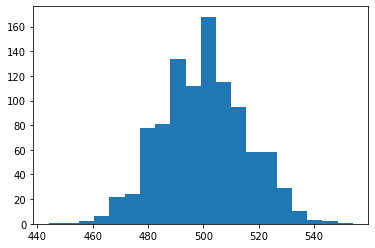

In [4]:
fig,ax=plt.subplots()
ax.hist(heads,bins=20)
plt.show()

In [5]:
heads.max()

554.0

Getting 550 heads is possible but very unlikely when $p=1/2$ (a fair coin).  Instead, let's apply the machinary of Bayes:

Let's say we have $N$ total flips and get $n$ heads.  The probably of finding $n$ heads for a given $p$ gives us the probabability of the data (the likelihood):
$$P(D | H) = P(n | r) = p^n (1-p)^{N-n} \Big(\frac{N}{n} \Big)$$
where we have the binomial coefficient $\Big(\frac{N}{n} \Big)$ which accounts for all the possible ways of getting $n$ heads (e.g. if you get only $n=1$, it could have been on the first, second...,last flip of the coin).

We have no idea what the probably of the different models is, so we will assume a flat distribution $P(p) = $ constant.  Finally, we need to normalize the result by dividing by the integral over $p$, such that
$$P(p| n ) =  p^n (1-p)^{N-n} \Big(\frac{N}{n} \Big) /(\int_0^1 dp p^n (1-p)^{N-n} \Big(\frac{N}{n} \Big))$$


Let's apply this to $N=1000$ and $n=550$:

In [6]:
from scipy import integrate
from scipy import special

In [7]:
integrate.quad(lambda p:p**(550)*(1-p)**(450)*special.binom(1000,500),0,1)

(0.14876167743337448, 4.263789920566359e-09)

(0.5, 0.6)

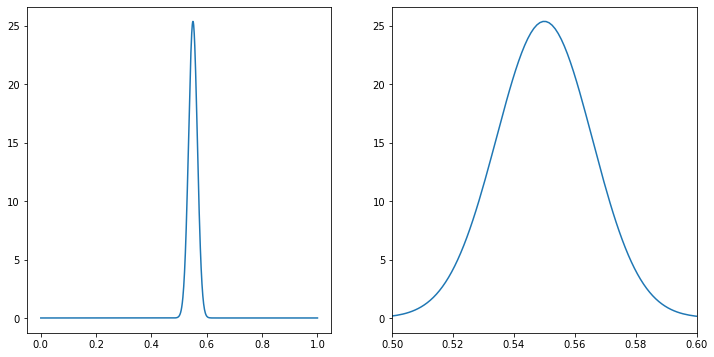

In [8]:
p_lin=np.linspace(0,1,1000)
fig,ax=plt.subplots(figsize=(12,6),ncols=2)
ax[0].plot(p_lin,p_lin**(550)*(1-p_lin)**(450)*special.binom(1000,500)/0.14876167743337448)
ax[1].plot(p_lin,p_lin**(550)*(1-p_lin)**(450)*special.binom(1000,500)/0.14876167743337448)
ax[1].set_xlim(0.5,0.6)

Note: the binomial coefficients are totally unnecessary but they keep us from multiplying and dividing by very small numbers:

In [9]:
integrate.quad(lambda p:p**(550)*(1-p)**(450),0,1)

(5.505028184578253e-301, 9.11751014007829e-301)

Now we can still compare to simulations.  Notice that our distribution is peark at 0.55 =550/1000, so we can simulate $p=0.55$ and compare to our figure

In [10]:
N_sims=1000
heads_p=np.zeros(N_sims)
for i in range(N_sims):
    heads_p[i]=(np.random.rand(1000) < 0.55).sum()/1000.   

(0.5, 0.6)

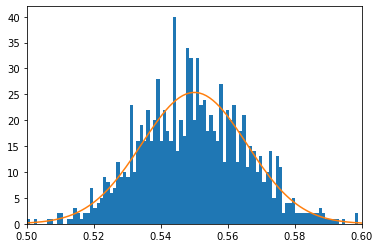

In [13]:
fig,ax=plt.subplots()
ax.hist(heads_p,bins=100)
ax.plot(p_lin,p_lin**(550)*(1-p_lin)**(450)*special.binom(1000,500)/0.14876167743337448)
ax.set_xlim(0.5,0.6)

## Gaussian Noise

Now let us return to our previous discussion of data where we had a deterministic model for the signal and a random source of noise 
$$ data(t)=S(t) + noise(t)$$ 
The noise is drawn from a Gaussian distribution with a standard deviation $\sigma$